# Analyse unseres Datensatzes #

In [2]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
# Load the latest version
ds = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "malaiarasugraj/global-health-statistics","Global Health Statistics.csv")


# Dimension des Datensatzes
print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Anzahl Zeilen: 1000000
Anzahl Spalten: 22


In [5]:
# Erste 10 Zeilen
ds.head(10)

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,57.74,3.34,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,89.21,1.33,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,56.41,4.07,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,85.20,3.18,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,67.00,4.61,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
5,Saudi Arabia,2011,Dengue,Bacterial,10.99,6.49,4.64,61+,Female,479234,98.41,3.50,0.62,Therapy,42671,Yes,93.17,416,9.83,29597,0.46,56.50
6,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931,90.03,3.16,3.31,Surgery,15579,No,92.80,4535,0.89,60027,0.70,20.48
7,Nigeria,2007,Tuberculosis,Neurological,3.48,5.71,1.21,0-18,Female,393296,75.60,0.54,3.54,Medication,15744,Yes,65.45,4584,9.81,23222,0.46,66.49
8,Italy,2000,Rabies,Chronic,15.59,4.74,6.38,19-35,Female,253110,87.87,4.56,5.84,Therapy,7669,Yes,59.23,2253,9.92,30849,0.55,41.27
9,Australia,2006,Cholera,Chronic,10.12,2.08,6.00,61+,Male,174143,95.90,4.63,6.01,Medication,9468,Yes,93.21,4694,2.96,68856,0.90,83.30


In [6]:
# Infos über Spalten
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [7]:
# Deskriptive Stats für numerische Spalten
ds.describe()

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.496934,2499.144809,5.002593,50311.099835,0.650069,54.985212
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.155168,1443.923798,2.888298,28726.959359,0.144472,20.214042
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.220000,1245.000000,2.500000,25457.000000,0.530000,37.470000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.470000,2499.000000,5.000000,50372.000000,0.650000,54.980000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,86.780000,3750.000000,7.510000,75195.000000,0.780000,72.510000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000


In [8]:
# Anzahl unique Werte pro Spalte
ds.nunique()

Country                                   20
Year                                      25
Disease Name                              20
Disease Category                          11
Prevalence Rate (%)                     1991
Incidence Rate (%)                      1491
Mortality Rate (%)                       991
Age Group                                  4
Gender                                     3
Population Affected                   632061
Healthcare Access (%)                   5001
Doctors per 1000                         451
Hospital Beds per 1000                   951
Treatment Type                             4
Average Treatment Cost (USD)           49901
Availability of Vaccines/Treatment         2
Recovery Rate (%)                       4901
DALYs                                   5000
Improvement in 5 Years (%)              1001
Per Capita Income (USD)                99498
Education Index                           51
Urbanization Rate (%)                   7001
dtype: int

# Beschreibung der einzelnen Spalten #

- *Country*: Name des Landes, in dem die Gesundheitsdaten erfasst wurden...
- *Year*: Jahr, in dem die Daten erhoben wurden.
- *Disease Name*: Name der Krankheit oder des Gesundheitszustands, der erfasst wurde.
- *Disease Category*: Kategorie der Krankheit (z. B. infektiös, nicht übertragbar).
- *Prevalence Rate*: Der Prozentsatz der von der Krankheit betroffenen Bevölkerung.
- *Inzidenzrate*: Der Prozentsatz der neuen oder neu diagnostizierten Fälle.
- *Mortality Rate*: Der Prozentsatz der betroffenen Bevölkerung, der an der Krankheit stirbt.
- *Age Group*: Die Altersgruppe, die am stärksten von der Krankheit betroffen ist.
- *Gender*: Das/die von der Krankheit betroffene(n) Geschlecht(e) (männlich, weiblich, beide).
- *Population Affected*: Die Gesamtzahl der von der Krankheit betroffenen Personen.
- *Healthcare Access*: Der Prozentsatz der Bevölkerung mit Zugang zu Gesundheitsversorgung.
- *Doctors per 1000*: Die Anzahl der Ärzte pro 1000 Einwohner.
- *Hospital Beds per 1000*: Die Anzahl der verfügbaren Krankenhausbetten pro 1000 Einwohner.
- *Treatment Type*: Die primäre Behandlungsmethode für die Krankheit (z. B. Medikamente, Operation).
- *Average Treatment Cost*: Die durchschnittlichen Kosten für die Behandlung der Krankheit in USD.
- *Availabilty of Vaccines/Treatment*: Ob Impfstoffe oder Behandlungen verfügbar sind.
- *Recovery Rate*: Der Prozentsatz der Menschen, die sich von der Krankheit erholen.
- *DALYs*: Disability-Adjusted Life Years (behinderungsbereinigte Lebensjahre), ein Maß für die Krankheitslast.
- *Improvement in 5 Years*: Die Verbesserung der Krankheitsverläufe in den letzten fünf Jahren.
- *Per Capita Income*: Das durchschnittliche Einkommen pro Person im Land in USD.
- *Education Index*: Das durchschnittliche Bildungsniveau im Land.
- *Urbanization Rate*: Der Prozentsatz der Bevölkerung, der in städtischen Gebieten lebt.

In [9]:
# Eindeutige Wert der kategorischen Variablen

print(f"Country: {ds["Country"].unique()}\n")
print(f"Disease Name: {ds["Disease Name"].unique()}\n")
print(f"Disease Category: {ds["Disease Category"].unique()}\n")
print(f"Age Group: {ds["Age Group"].unique()}\n")
print(f"Gender: {ds["Gender"].unique()}\n")
print(f"Treatment Type: {ds["Treatment Type"].unique()}\n")
print(f"Availability of Vaccines/Treatment: {ds["Availability of Vaccines/Treatment"].unique()}\n")

Country: ['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']

Disease Name: ['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']

Disease Category: ['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']

Age Group: ['0-18' '61+' '36-60' '19-35']

Gender: ['Male' 'Other' 'Female']

Treatment Type: ['Medication' 'Surgery' 'Vaccination' 'Therapy']

Availability of Vaccines/Treatment: ['No' 'Yes']



Messniveaus der kategorischen Spalten:
- Country: Nominal
- Disease Name: Nominal
- Disease Category: Nominal
- Age Group: Ordinal
- Gender: Nominal
- Treatment Type: Nominal
- Availability of Vaccines/Treatment: Nominal

# Visualisierungen #

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Russia'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'China'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'Saudi Arabia'),
  Text(10, 0, 'Australia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'USA'),
  Text(13, 0, 'Turkey'),
  Text(14, 0, 'Italy'),
  Text(15, 0, 'Argentina'),
  Text(16, 0, 'Japan'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Indonesia'),
  Text(19, 0, 'Brazil')])

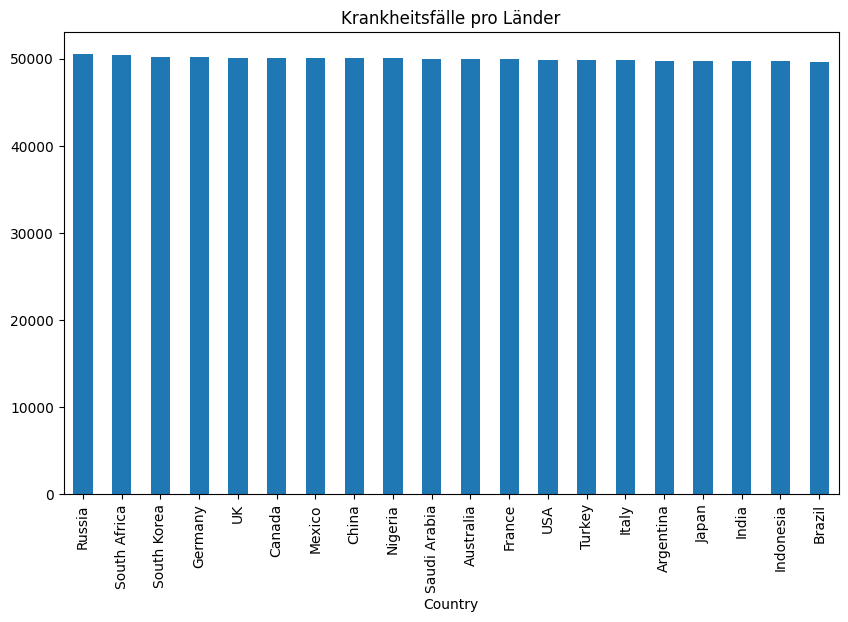

In [10]:
ds["Country"].value_counts().plot(kind="bar")
plt.title('Krankheitsfälle pro Länder')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, "Alzheimer's Disease"),
  Text(1, 0, 'Asthma'),
  Text(2, 0, 'COVID-19'),
  Text(3, 0, 'Cancer'),
  Text(4, 0, 'Cholera'),
  Text(5, 0, 'Dengue'),
  Text(6, 0, 'Diabetes'),
  Text(7, 0, 'Ebola'),
  Text(8, 0, 'HIV/AIDS'),
  Text(9, 0, 'Hepatitis'),
  Text(10, 0, 'Hypertension'),
  Text(11, 0, 'Influenza'),
  Text(12, 0, 'Leprosy'),
  Text(13, 0, 'Malaria'),
  Text(14, 0, 'Measles'),
  Text(15, 0, "Parkinson's Disease"),
  Text(16, 0, 'Polio'),
  Text(17, 0, 'Rabies'),
  Text(18, 0, 'Tuberculosis'),
  Text(19, 0, 'Zika')])

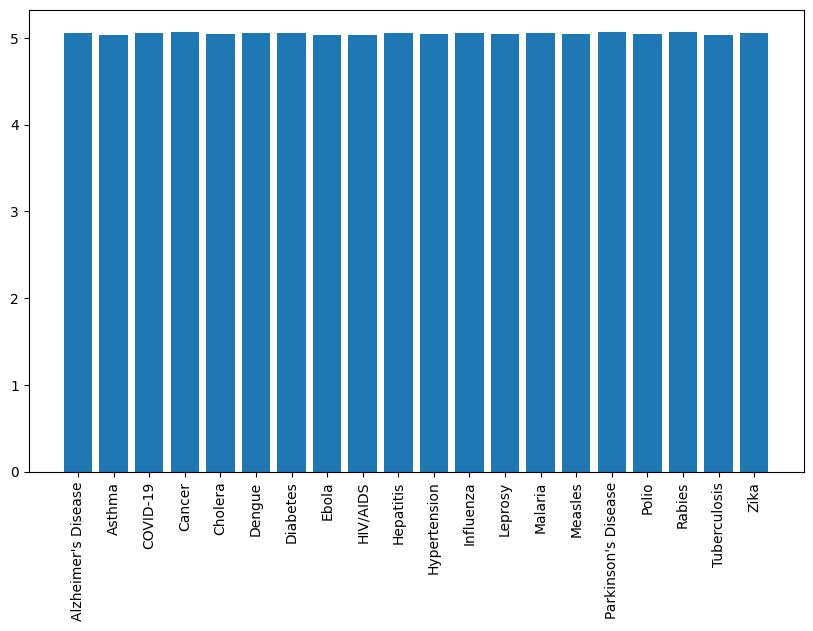

In [11]:
mean_mortality = ds.groupby('Disease Name')['Mortality Rate (%)'].mean().reset_index()
plt.bar(mean_mortality['Disease Name'], mean_mortality['Mortality Rate (%)'])
plt.xticks(rotation=90)

<Axes: xlabel='Mortality Rate (%)', ylabel='Disease Name'>

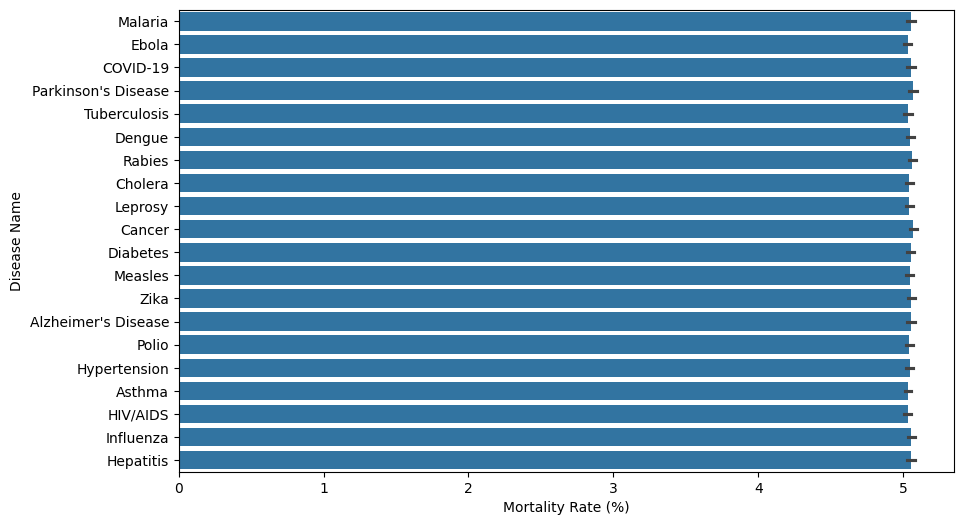

In [14]:
sns.barplot(x='Mortality Rate (%)', y='Disease Name', data=ds)